In [5]:
from __future__ import division

In [6]:
import math
import random
import numpy as np
import pandas as pd

In [7]:
from sklearn import datasets

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
%load_ext autoreload
%autoreload 1

%aimport gtree

## Concepts:

### Tree
A Tree is an object that takes input data and determines what leaf it ends up in.  Unlike many tree implementations, the Tree itself doesn't store data about the value of a leaf.  That is stored externally.


### loss_fn
A loss_fn is a function that takes data rows, the predicted targets for those rows, and the actual targets for those rows, and returns a single value that determines the "LOSS" or "COST" of that prediction (lower cost/loss is better)

```
def loss_fn(predicted_targets, actual_targets) -> float
```

### leaf_prediction_fn
A leaf_prediction_fn is a function which takes the features and actual targets that end up in a leaf and returns a Series of the predictions for each row ending up in that leaf.  It is typically a constant function whose value is either the mean good rate in that leaf (among the actual targets) or the median target, but can be anything else

```
def leaf_prediction_fn(features) -> pd.Series
```


### leaf_prediction_builder
A leaf_prediction_builder is a function which takes the features and actual targets that end up in a TRANING leaf and returns a leaf_prediction_fn.  This leaf_prediction_fn is used to predict the value of testing rows that end up in the same leaf.

```
def leaf_prediction_builder(features, actual_targets) -> leaf_prediction_fn
```


### leaf_prediction_map
A leaf_prediction_map is a map of leaf ids (eg their hash) to the leaf_prediction_fn for that leaf.  One can only use a tree to score data if one has a leaf_prediction_map.  This design allows on to use the same tree as a subset of another tree without having their leaf values become entangled.

In [ ]:
data = pd.DataFrame({'A': [0.1, 10, .02],
                     'B': [10, 20, 30]},
                    index=['foo', 'bar', 'baz'])

In [ ]:
t = BranchNode('A', 0.5, None, None)
t.left = LeafNode() #'A', 0.5, 10, 20)
t.right = LeafNode() #'A', 0.5, 100, 0)


leaf_map = {hash(t.left): 10,
            hash(t.right): 20}

t.predict(data, leaf_map)

In [ ]:
df = pd.DataFrame({'foo': pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])})


gtree._single_variable_best_split(df,
                            'foo',
                            pd.Series([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]),
                            cross_entropy)

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                   'B': [10, 20, 50, 30, 40, 50, 60, 50, 70, 90, 100, 110 ]})
target = pd.Series([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

tree, leaf_map = train_greedy_tree(df, target, cross_entropy)

In [ ]:
tree.prn()

In [ ]:
leaf_map

In [ ]:
calculate_leaf_map(tree, df, target)

In [ ]:
random_node(tree)

In [ ]:
print get_all_nodes(tree)

In [ ]:
mate(tree, tree).prn()

In [32]:
features, targets = datasets.make_hastie_10_2(n_samples=1000)

features = pd.DataFrame(features, columns=['feature_{}'.format(i) for i in range(features.shape[1])])
targets = pd.Series(targets, name='target')
targets = targets.map(lambda x: 1.0 if x > 0 else 0.0)

In [33]:
features.shape

(1000, 10)

In [34]:
targets.value_counts()

1.0    503
0.0    497
Name: target, dtype: int64

In [40]:
tree, leaf_map = gtree.train_greedy_tree(features, targets, loss_fn=gtree.accuracy_loss, max_depth=4)

Loss for feature_0 -0.637877969467 -553.0
Loss for feature_1 0.782047318842 -569.0
Loss for feature_2 0.66961163847 -557.0
Loss for feature_3 -1.37925845893 -549.0
Loss for feature_4 1.05187964493 -567.0
Loss for feature_5 0.669634532842 -561.0
Loss for feature_6 -0.621950781697 -559.0
Loss for feature_7 -0.422362256124 -557.0
Loss for feature_8 -1.09508365561 -557.0
Loss for feature_9 0.704646353561 -569.0
Training.  Depth 4 Current Loss: -503.0 Best Split: feature_1 0.782047318842 -569.0
Loss for feature_0 -0.906313242775 -459.0
Loss for feature_1 -1.31693042983 -468.0
Loss for feature_2 1.24075238602 -462.0
Loss for feature_3 1.37572159327 -464.0
Loss for feature_4 1.05187964493 -475.0
Loss for feature_5 0.960563455139 -471.0
Loss for feature_6 -1.11532779354 -464.0
Loss for feature_7 1.10635323102 -458.0
Loss for feature_8 -1.25756097818 -463.0
Loss for feature_9 0.791048831807 -481.0
Training.  Depth 3 Current Loss: -428.0 Best Split: feature_9 0.791048831807 -481.0
Loss for featu

In [41]:
tree.prn()

				Leaf(289050469)

			feature_0 1.8954746145

				Leaf(289076405)

		feature_1 -1.31693042983

				Leaf(289034601)

			feature_5 1.20691807486

				Leaf(289034585)

	feature_9 0.791048831807

				Leaf(289076397)

			feature_8 -2.39774774402

				Leaf(289076261)

		feature_1 0.681402469517

				Leaf(289034613)

			feature_0 -1.54001096092

				Leaf(289034621)

feature_1 0.782047318842

	Leaf(289034625)



In [43]:
leaf_map

{289034585: <function gtree.<lambda>>,
 289034601: <function gtree.<lambda>>,
 289034613: <function gtree.<lambda>>,
 289034621: <function gtree.<lambda>>,
 289034625: <function gtree.<lambda>>,
 289050469: <function gtree.<lambda>>,
 289076261: <function gtree.<lambda>>,
 289076397: <function gtree.<lambda>>,
 289076405: <function gtree.<lambda>>}

In [57]:
results = pd.DataFrame({'truth': targets, 'prediction': tree.predict(features, leaf_map)})

In [60]:
-1*gtree.accuracy_loss(results.prediction, results.truth)

0.67400000000000004

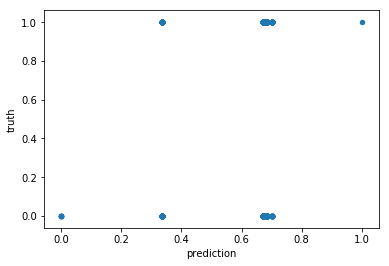

In [58]:
results.plot(kind='scatter', x='prediction', y='truth')